
# Transformations of Random Variables in 1D

This notebook illustrates how probability densities change under deterministic
transformations \(Y = g(X)\), a key concept behind change-of-variables and
normalizing flows in later sections of Chapter 5.


In [1]:
import os
os.makedirs('figs', exist_ok=True)

In [2]:
import os
os.makedirs("figs", exist_ok=True)

import numpy as np
import math
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

def normal_sample(mu, sigma, size):
    return rng.normal(mu, sigma, size)

def normal_pdf(x, mu, sigma):
    return (1.0 / (math.sqrt(2 * math.pi) * sigma)
            * np.exp(-0.5 * ((x - mu) / sigma) ** 2))



## 1. Affine Transformation \(Y = aX + b\)

If \(X \sim \mathcal{N}(0,1)\) and \(Y = aX + b\), then
\(Y \sim \mathcal{N}(b, a^2)\).  We verify this numerically.


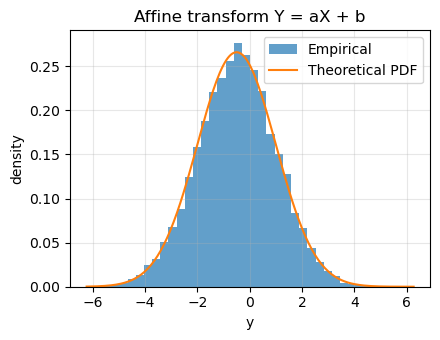

In [3]:

mu_x, sigma_x = 0.0, 1.0
N = 20000
X = normal_sample(mu_x, sigma_x, N)

a, b = 1.5, -0.5
Y_affine = a * X + b

plt.figure(figsize=(4.5, 3.5))
counts, bins, _ = plt.hist(Y_affine, bins=40, density=True, alpha=0.7, label="Empirical")

ys = np.linspace(Y_affine.min(), Y_affine.max(), 200)
pdf_y = normal_pdf((ys - b) / a, mu_x, sigma_x) * (1.0 / abs(a))

plt.plot(ys, pdf_y, label="Theoretical PDF")
plt.xlabel("y")
plt.ylabel("density")
plt.title("Affine transform Y = aX + b")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('figs/transformations_1d_fig_1.png', dpi=300, bbox_inches='tight')
plt.show()



## 2. Squaring Transformation \(Y = X^2\)

Let \(X \sim \mathcal{N}(0,1)\) and define \(Y = X^2\).  Then \(Y \ge 0\) and
for \(y>0\) there are two preimages, \(x = \pm \sqrt{y}\).
The change-of-variables formula gives

\[
p_Y(y) = \\frac{p_X(\\sqrt{y}) + p_X(-\\sqrt{y})}{2\\sqrt{y}}.
\]


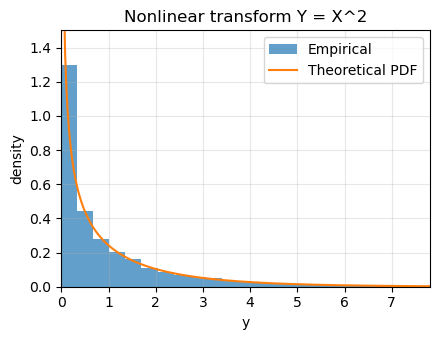

In [4]:
Y_square = X**2
Y_sq = Y_square  # alias for later multi-panel summary

plt.figure(figsize=(4.5, 3.5))
count_sq, bins_sq, _ = plt.hist(Y_square, bins=60, density=True, alpha=0.7, label="Empirical")

# Avoid the singularity at y = 0 by starting from a small positive value
ys_sq = np.linspace(1e-3, np.percentile(Y_square, 99.5), 300)
sqrt_y = np.sqrt(ys_sq)
pdf_y_sq = (normal_pdf(sqrt_y, mu_x, sigma_x) + normal_pdf(-sqrt_y, mu_x, sigma_x)) / (2.0 * sqrt_y)

plt.plot(ys_sq, pdf_y_sq, label="Theoretical PDF")

plt.xlabel("y")
plt.ylabel("density")
plt.title("Nonlinear transform Y = X^2")
plt.grid(alpha=0.3)
plt.legend()

# Focus on the bulk of the distribution, avoiding the extreme spike near zero
plt.xlim(0.0, np.percentile(Y_square, 99.5))
current_ylim = plt.gca().get_ylim()
# Cap the vertical range to keep the plot readable
plt.ylim(0.0, min(current_ylim[1], np.percentile(pdf_y_sq, 99.0) * 1.1))

plt.tight_layout()
plt.savefig('figs/transformations_1d_fig_2.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Saturating Nonlinearity \(Y = \tanh(X)\)

Finally, consider the transformation \(Y = \tanh(X)\).
Here, \(Y\) is constrained to the interval \((-1,1)\).
We compare empirical histograms for different input variances.


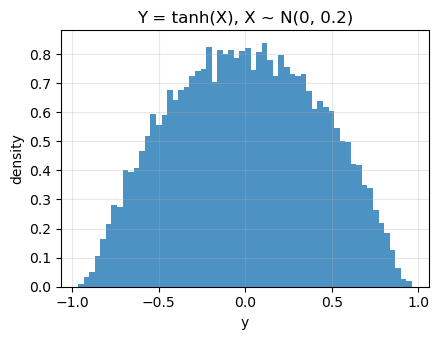

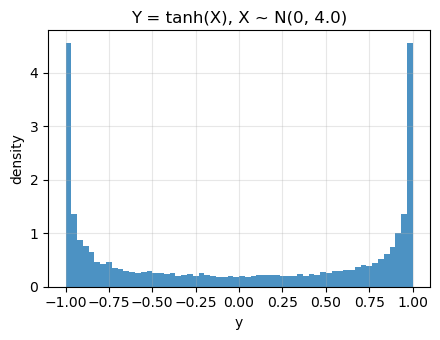

In [5]:
def tanh_transform(x):
    return np.tanh(x)

sigmas = [0.5, 2.0]

for i, sigma in enumerate(sigmas):
    X_sigma = normal_sample(0.0, sigma, N)
    Y_tanh = tanh_transform(X_sigma)

    plt.figure(figsize=(4.5, 3.5))
    plt.hist(Y_tanh, bins=60, density=True, alpha=0.8)
    plt.xlabel("y")
    plt.ylabel("density")
    plt.title(f"Y = tanh(X), X ~ N(0, {sigma**2:.1f})")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'figs/transformations_1d_tanh_sigma_{int(10*sigma)}.png', dpi=300, bbox_inches='tight')
    plt.show()


## 4. Discussion

This notebook demonstrates the core idea behind the change-of-variables formula:

- Probabilities are preserved under transformation, but **densities** change.
- Invertible maps \(Y=g(X)\) yield densities via the Jacobian of the inverse map.
- Even simple nonlinearities can produce strongly non-Gaussian outputs.


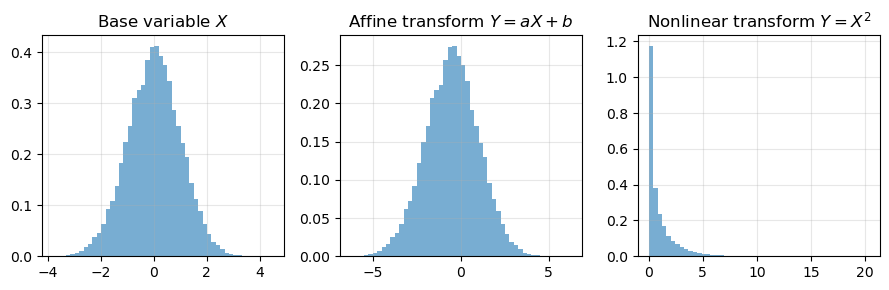

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Summarize key transformations in a single multi-panel figure.
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axs = axes.ravel()

try:
    # Panel 1: base samples (if variables exist)
    axs[0].hist(X, bins=50, density=True, alpha=0.6)
    axs[0].set_title('Base variable $X$')
except Exception:
    pass

try:
    # Panel 2: affine transform (if defined)
    axs[1].hist(Y_affine, bins=50, density=True, alpha=0.6)
    axs[1].set_title('Affine transform $Y = aX + b$')
except Exception:
    pass

try:
    # Panel 3: nonlinear squaring transform (if defined)
    axs[2].hist(Y_square, bins=50, density=True, alpha=0.6)
    axs[2].set_title('Nonlinear transform $Y = X^2$')
except Exception:
    pass

for ax in axs:
    ax.grid(alpha=0.3)

fig.tight_layout()
plt.savefig('figs/transformations_1d_multi_panel.png', dpi=300, bbox_inches='tight')
plt.show()